In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
from keypoint_detection import Keypoint_detector
kp_detector = Keypoint_detector(weights_path="pretrained_weights/baxter/pose_cfg_test.yamlsnapshot-1030000" , 
                                config="pretrained_weights/baxter/pose_cfg_test.yaml")

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
Running the weights: pretrained_weights/baxter/pose_cfg_test.yamlsnapshot-1030000


/home/jingpei/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-21 22:15:22.177394: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-21 22:15:22.217221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 22:15:22.224373: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had ne

In [7]:
file_name = "../dataset/baxter_poses/images/100.png"
img = cv2.imread(file_name)
imgScale = 0.25
newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
resized_img = cv2.resize(img,(int(newX),int(newY)))

results = kp_detector.predict_single_image(resized_img)
results = results[[0,1,2,3,4,5,6]]
points_predicted = results[:,:2] * 4
points_predicted = points_predicted.astype(int)
scores = results[:,2]
img = kp_detector.overwrite_image(img, points_predicted, scores)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 2047.5, 1535.5, -0.5)

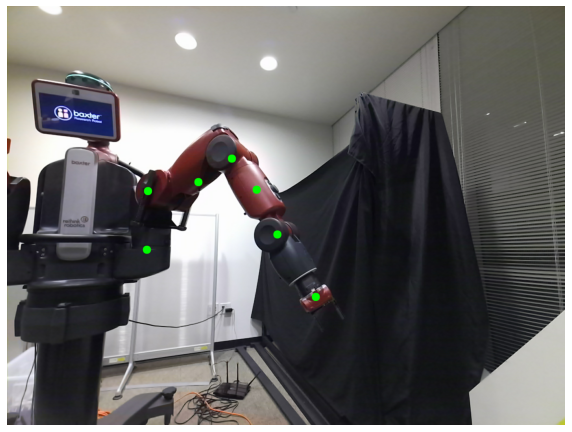

In [9]:
%matplotlib inline  
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')


In [10]:
file_name = "../dataset/baxter_wobbler/images/100.png"
img = cv2.imread(file_name)
imgScale = 0.25
newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
resized_img = cv2.resize(img,(int(newX),int(newY)))

results = kp_detector.predict_single_image(resized_img)
results = results[[0,1,2,3,4,5,6]]
points_predicted = results[:,:2] * 4
points_predicted = points_predicted.astype(int)
scores = results[:,2]
img = kp_detector.overwrite_image(img, points_predicted, scores)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 2047.5, 1535.5, -0.5)

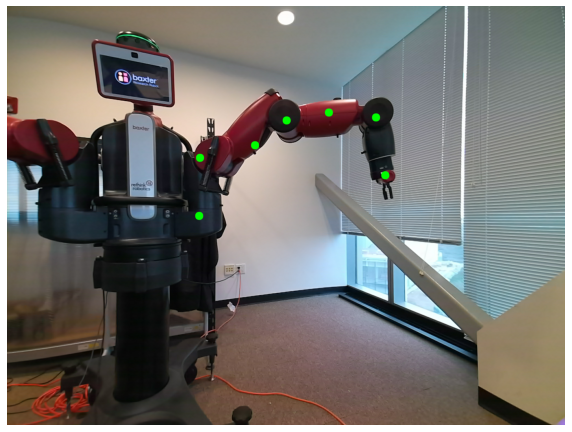

In [11]:
%matplotlib inline  
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')